### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

import pickle

### Loading the dataset

In [2]:
df = pd.read_csv('car_details.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape # view number of rows & columns

(4340, 8)

In [4]:
df.info() # view the information of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.isnull().sum() # checking for missing values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
df.describe() # view summary statistics

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### Exploratory Data Analysis

In [7]:
df.head() # view first 5 rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Univariate Analysis

In [8]:
df['name'].value_counts() # view number of different cars

name
Maruti Swift Dzire VDI                      69
Maruti Alto 800 LXI                         59
Maruti Alto LXi                             47
Maruti Alto LX                              35
Hyundai EON Era Plus                        35
                                            ..
Honda Jazz Select Edition                    1
Maruti Swift Dzire AMT VXI                   1
Hyundai Creta 1.6 SX Automatic               1
Mercedes-Benz E-Class 280 CDI Elegance       1
Audi RS7 2015-2019 Sportback Performance     1
Name: count, Length: 1491, dtype: int64

In [9]:
df['brand_name'] = df['name'].str.split(' ').str[0] # extracting just the brand name of the car
df = df.drop('name', axis=1)

In [10]:
df.head() # view first 5 rows

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_name
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [11]:
df['year'].value_counts() # view number of different year

year
2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: count, dtype: int64

In [12]:
df['fuel'].value_counts() # view number of different fuel types

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [13]:
df['seller_type'].value_counts() # view number of different seller_type

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [14]:
df['transmission'].value_counts() # view number of different transmission

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [15]:
df['owner'].value_counts() # view number of different owner

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

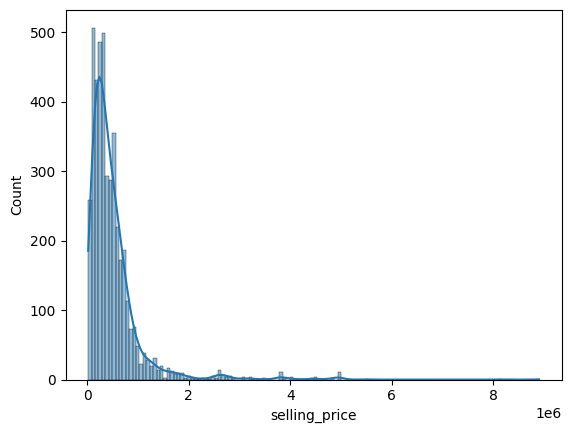

In [16]:
sns.histplot(df['selling_price'], kde=True) # viewing distribution of selling_price
plt.show()

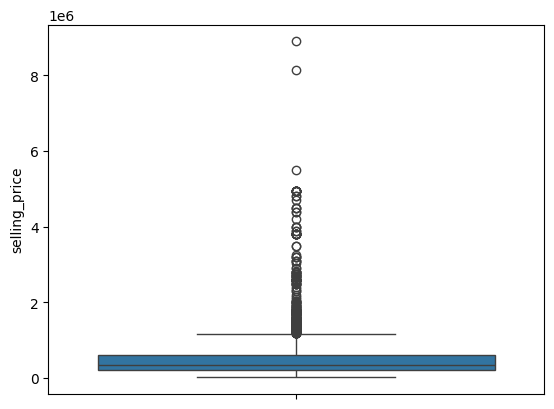

In [17]:
sns.boxplot(df['selling_price']) # plotting boxplot to see outliers
plt.show()

In [18]:
df['selling_price'].skew() # checking skewness  of selling price

np.float64(4.892021472306356)

### Bivariate Analysis

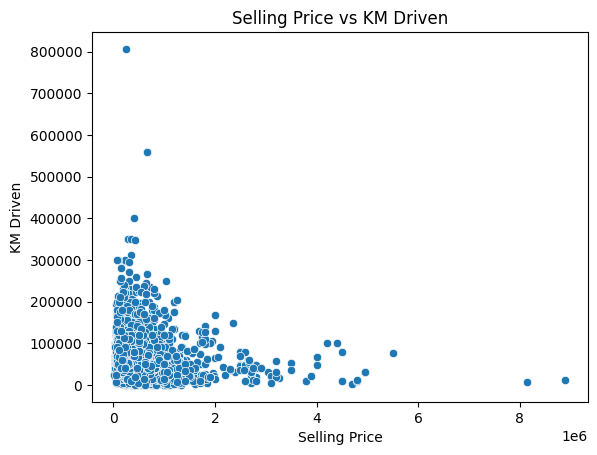

In [19]:
# checking relation between selling price and km driven
sns.scatterplot(x=df['selling_price'], y=df['km_driven'])
plt.xlabel('Selling Price')
plt.ylabel('KM Driven')
plt.title('Selling Price vs KM Driven')
plt.show()

In [20]:
# viewing correlation of different features w.r.t selling_price
df_numeric = df.select_dtypes(include=['int64'])
df_numeric.corr()['selling_price']

year             0.413922
selling_price    1.000000
km_driven       -0.192289
Name: selling_price, dtype: float64

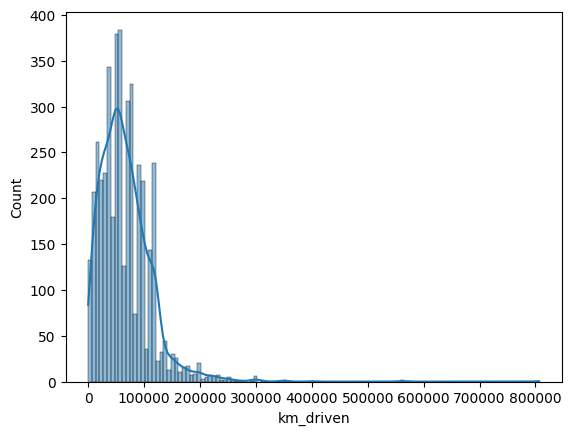

In [21]:
sns.histplot(df['km_driven'], kde=True) # viewing distribution of km_driven
plt.show()

In [22]:
df['km_driven'].skew() # checking skewness of km_driven

np.float64(2.6690569869843133)

In [23]:
df['car_age'] = 2025 - df['year'] # calculating the age of car
df = df.drop('year', axis=1)

In [24]:
df.head() # view first 5 rows

,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_name,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,18
1,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,18
2,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,13
3,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,8
4,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,11


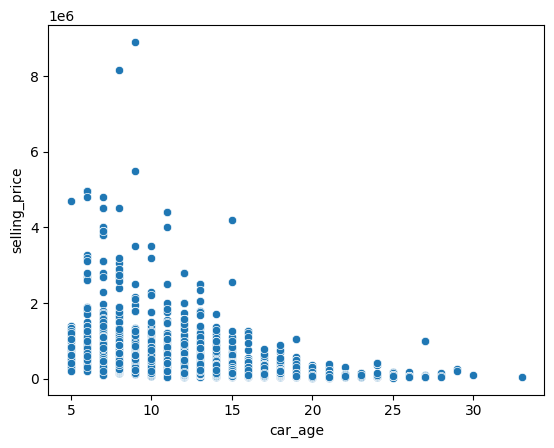

In [25]:
# checking relation between selling price and car age
sns.scatterplot(x=df['car_age'], y=df['selling_price'])
plt.show()

In [26]:
# viewing correlation of different features w.r.t selling_price
df_numeric = df.select_dtypes(include=['int64'])
df_numeric.corr()['selling_price']

selling_price    1.000000
km_driven       -0.192289
car_age         -0.413922
Name: selling_price, dtype: float64

In [27]:
df.head() # view first 5 rows

,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_name,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,18
1,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,18
2,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,13
3,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,8
4,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,11


In [28]:
# grouping low count fuel types into a new category
fuels_to_group = ['CNG', 'LPG', 'Electric']
df['fuel'] =  df['fuel'].replace({fuel : 'Other' for fuel in fuels_to_group})

In [29]:
df['fuel'].value_counts() # checking the new counts

fuel
Diesel    2153
Petrol    2123
Other       64
Name: count, dtype: int64

In [30]:
# grouping low count seller type into a new category
seller_type_to_group = ['Dealer', 'Trustmark Dealer']
df['seller_type'] = df['seller_type'].replace({seller_type: 'other_dealer' for seller_type in seller_type_to_group})
df['seller_type'].value_counts() # checking the new counts

seller_type
Individual      3244
other_dealer    1096
Name: count, dtype: int64

In [31]:
df.head() # view first 5 rows

,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_name,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,18
1,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,18
2,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,13
3,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,8
4,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,11


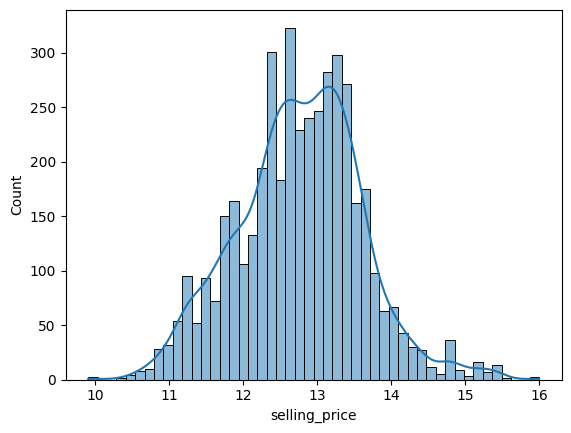

In [32]:
df['selling_price'] = np.log(df['selling_price']) # applying log transform to selling_price
sns.histplot(df['selling_price'], kde=True)
plt.show()

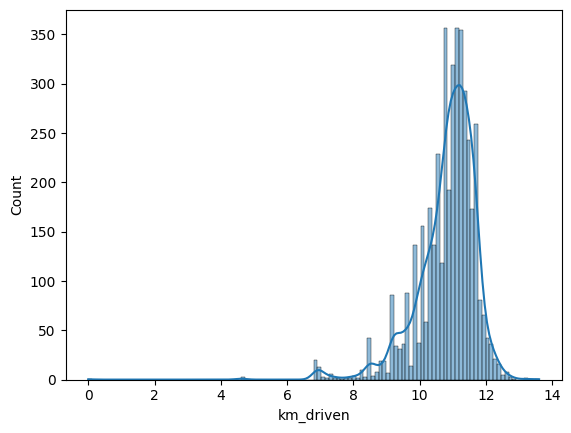

In [33]:
df['km_driven'] = np.log(df['km_driven']) # applying log transform to km_driven
sns.histplot(df['km_driven'], kde=True)
plt.show()

In [34]:
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'brand_name'], drop_first=True) # one-hot encoding features

In [35]:
df.head() # view first 5 rows

,selling_price,km_driven,owner,car_age,fuel_Other,fuel_Petrol,seller_type_other_dealer,transmission_Manual,brand_name_Audi,brand_name_BMW,...,brand_name_Mercedes-Benz,brand_name_Mitsubishi,brand_name_Nissan,brand_name_OpelCorsa,brand_name_Renault,brand_name_Skoda,brand_name_Tata,brand_name_Toyota,brand_name_Volkswagen,brand_name_Volvo
0,11.002100,11.156251,First Owner,18,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,11.813030,10.819778,First Owner,18,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,13.304685,11.512925,First Owner,13,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12.429216,10.736397,First Owner,8,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13.017003,11.856515,Second Owner,11,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
df['owner'].value_counts() # viewing number of different categories in owner

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [37]:
# ordinal encoding owner feature
owner_categories = ['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']
ordinal_encoder = OrdinalEncoder(categories=[owner_categories])
df['owner_encoded'] = ordinal_encoder.fit_transform(df[['owner']])

In [38]:
df_encoded = df.drop('owner', axis=1) # dropping the owner feature

In [39]:
df.columns # viewing encoded columns

Index(['selling_price', 'km_driven', 'owner', 'car_age', 'fuel_Other',
       'fuel_Petrol', 'seller_type_other_dealer', 'transmission_Manual',
       'brand_name_Audi', 'brand_name_BMW', 'brand_name_Chevrolet',
       'brand_name_Daewoo', 'brand_name_Datsun', 'brand_name_Fiat',
       'brand_name_Force', 'brand_name_Ford', 'brand_name_Honda',
       'brand_name_Hyundai', 'brand_name_Isuzu', 'brand_name_Jaguar',
       'brand_name_Jeep', 'brand_name_Kia', 'brand_name_Land', 'brand_name_MG',
       'brand_name_Mahindra', 'brand_name_Maruti', 'brand_name_Mercedes-Benz',
       'brand_name_Mitsubishi', 'brand_name_Nissan', 'brand_name_OpelCorsa',
       'brand_name_Renault', 'brand_name_Skoda', 'brand_name_Tata',
       'brand_name_Toyota', 'brand_name_Volkswagen', 'brand_name_Volvo',
       'owner_encoded'],
      dtype='object')

### Model Building

In [40]:
# separating independent and dependent features
X = df_encoded.drop('selling_price', axis=1)
y = df_encoded['selling_price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # making training and testing sets

In [42]:
# scaling the independent features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Testing on Linear Regression to get a base estimate
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)

linear_regression_model_pred = linear_regression_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, linear_regression_model_pred)
mse = mean_squared_error(y_test, linear_regression_model_pred)
rmse = root_mean_squared_error(y_test, linear_regression_model_pred)
r2 = r2_score(y_test, linear_regression_model_pred)

print('Linear Regression results:')
print(f'Linear Regression MAE: {mae}')
print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression RMSE: {rmse}')
print(f'Linear Regression R2 Score: {r2}')

Linear Regression results:
Linear Regression MAE: 0.3004333667977612
Linear Regression MSE: 0.1560770162095188
Linear Regression RMSE: 0.39506583781633003
Linear Regression R2 Score: 0.773684487377718


In [44]:
# Making a dictionary of various regression models
models = {
    'linear_regression': LinearRegression(),
    'lasso_regression': Lasso(),
    'ridge_regression': Ridge(),
    'decision_tree': DecisionTreeRegressor(),
    'svr': SVR(),
    'knn_regressor': KNeighborsRegressor(),
    'random_forest': RandomForestRegressor(),
    'gradient_boosting': GradientBoostingRegressor(),
    'xg_boost': XGBRegressor(),
}

### Model Training

In [45]:
model_results = {} # empty dictionary to store the model results

for name, model in models.items():
    print(f'Training {name}...')
    model.fit(X_train_scaled, y_train) # training the model
    y_pred = model.predict(X_test_scaled) # making predictions

    mae = mean_absolute_error(y_test, y_pred) # calculating MAE
    mse = mean_squared_error(y_test, y_pred) # calculating MSE
    rmse = root_mean_squared_error(y_test, y_pred) # calculating RMSE
    r2 = r2_score(y_test, y_pred) # calculating R2 Score

    # storing the results
    model_results[name] = {
        'model': model,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2_score': r2
    }

Training linear_regression...
Training lasso_regression...
Training ridge_regression...
Training decision_tree...
Training svr...
Training knn_regressor...
Training random_forest...
Training gradient_boosting...
Training xg_boost...


In [46]:
# Making a dataframe out of model results for better readability
results_df = pd.DataFrame.from_dict(model_results, orient='index')
results_df = results_df.reset_index().rename(columns={'index': 'model name'})

display_columns = ['model name', 'mae', 'mse', 'rmse', 'r2_score']
results_df = results_df[display_columns].sort_values('r2_score', ascending=False)

results_df_formatted = results_df.round(4)
results_df_formatted

,model name,mae,mse,rmse,r2_score
8,xg_boost,0.2647,0.1243,0.3526,0.8198
6,random_forest,0.2530,0.1275,0.3570,0.8152
4,svr,0.2670,0.1316,0.3627,0.8092
5,knn_regressor,0.2821,0.1445,0.3801,0.7905
7,gradient_boosting,0.2938,0.1458,0.3818,0.7886
0,linear_regression,0.3004,0.1561,0.3951,0.7737
2,ridge_regression,0.3005,0.1561,0.3951,0.7737
3,decision_tree,0.2969,0.1991,0.4462,0.7113
1,lasso_regression,0.6618,0.6899,0.8306,-0.0004


### Saving the best model

In [47]:
best_model = models['xg_boost']

In [48]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)